<a href="https://colab.research.google.com/github/A-Peoples/NFL-Efficiency/blob/main/Two_Point_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [ ]:
!pip install nfl_data_py

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

import nfl_data_py as nfl
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
import seaborn as sns


**Creating The Overall Two-Point Conversion Rating**

2023 done.
Downcasting floats.


<ipython-input-181-c96ad9f68966>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["average_scored"] = np.where(df["two_point_conv_result"] == 'success', 1, 0)


<Axes: xlabel='play_type', ylabel='average_scored'>

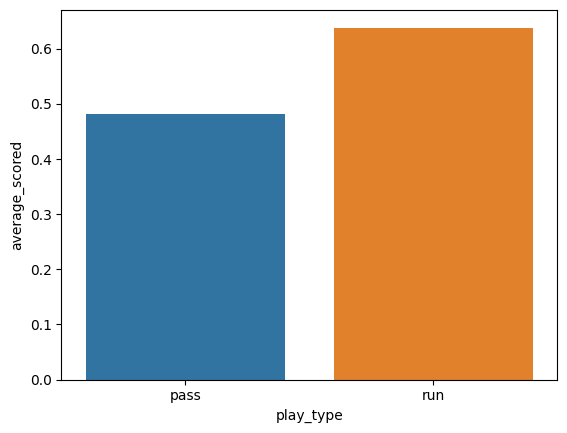

In [ ]:
df = nfl.import_pbp_data([2023])

df.columns.values
df = df.loc[df["two_point_attempt"] == 1]
df["two_point_conv_result"].unique()
df["average_scored"] = np.where(df["two_point_conv_result"] == 'success', 1, 0)
df = df.loc[(df["play_type"] == "run") | (df["play_type"] == "pass")]
df = df.groupby(["play_type"]).agg({"average_scored": "mean"})

sns.barplot(data=df, x='play_type', y='average_scored', hue="play_type")

**Creating Individual Team Two-Point Conversion Stats**

In [ ]:
teams = ['WAS', 'ARI', 'BUF', 'NYJ', 'ATL', 'CAR', 'CIN', 'CLE',
       'NYG', 'DAL', 'DET', 'KC', 'CHI', 'GB', 'BAL', 'HOU', 'IND', 'JAX',
       'SEA', 'LA', 'LV', 'DEN', 'MIA', 'LAC', 'PHI', 'NE', 'PIT', 'SF',
       'MIN', 'TB', 'NO', 'TEN']
df = nfl.import_pbp_data([2023])
ulti_team = pd.DataFrame()
for team in teams:

  inde_df = df.loc[(df['posteam'] == team) & (df['two_point_attempt'] == 1)]


  inde_df["average_scored"] = np.where(inde_df["two_point_conv_result"] == 'success', 1, 0)

  passes = inde_df.loc[(inde_df["play_type"] == "pass")]
  passes["count"] = passes["play_type"].count()
  passes = passes.groupby(['posteam', 'count', 'play_type']).agg({"average_scored": "mean"})

  rushes = inde_df.loc[(inde_df["play_type"] == "run")]
  rushes["count"] = rushes["play_type"].count()
  rushes = rushes.groupby(['posteam', 'count', 'play_type']).agg({"average_scored": "mean"})

  indi_df = pd.concat([rushes, passes])
  ulti_team = pd.concat([ulti_team, indi_df])

2023 done.
Downcasting floats.


<ipython-input-189-a6d07a53411e>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inde_df["average_scored"] = np.where(inde_df["two_point_conv_result"] == 'success', 1, 0)
<ipython-input-189-a6d07a53411e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inde_df["average_scored"] = np.where(inde_df["two_point_conv_result"] == 'success', 1, 0)
<ipython-input-189-a6d07a53411e>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

**Final Print of Individual Team Two-Point Conversion Stats**

In [ ]:
ulti_team = ulti_team.sort_values(by=["average_scored", 'count'], ascending=False).reset_index()
ulti_team

,posteam,count,play_type,average_scored
0,DAL,3,pass,1.000000
1,WAS,2,run,1.000000
2,NYJ,2,run,1.000000
3,CAR,2,run,1.000000
4,JAX,2,run,1.000000
5,NO,2,run,1.000000
6,NO,2,pass,1.000000
7,CAR,1,pass,1.000000
8,CIN,1,pass,1.000000
9,NYG,1,run,1.000000
